In the case of two chambers the equation for the stick period are
\begin{equation}
\frac{\Delta P_s}{dt} =\frac{k_s}{V_s}\left(\frac{\pi a_d^4}{8 mu l_d} (P_d - P_s) - \frac{\pi a_s^4}{8 mu l_s} (P_s + P_t)\right) 
\end{equation}
\begin{equation}
\frac{\Delta P_d}{dt} =-\frac{k_d}{V_d}\frac{\pi a_d^4}{8 mu l_d} (P_d - P_s)
\end{equation}
In dimensionless form, scaling by properties of the lower conduit, properties of the upper chamber, and scaling pressures by $P_t$ they can be written 
\begin{equation}
\frac{\Delta P_s}{dt} =(P_d - P_s) - T_1(P_s + R_3)
\end{equation}
\begin{equation}
\frac{\Delta P_d}{dt} =- \phi (P_d - P_s)
\end{equation}
where 
\begin{equation}
T_1 = \frac{a_s l_d}{a_d l_s}
\end{equation}

\begin{equation}
\phi = \frac{k_d V_s}{k_s V_d }
\end{equation}

\begin{equation}
R_3 = \frac{P_t S}{F_s}
\end{equation}
The general solution is obtained below

In [4]:
from sympy import *
t,T1,phi,R1,R3,R5,n = symbols('t,T1,phi,R1,R3,R5,n',positive = True,real = True)
C1,C2,ps0,pd0 = symbols('C1,C2,ps0,pd0')
ps,pd  = symbols('ps, pd', cls =Function, function = True)
eqps = Eq(diff(ps(t),t), (-1 - T1) * ps(t) + 1 * pd(t) - R3 * T1)
eqpd = Eq(diff(pd(t),t), - phi * (pd(t) - ps(t))) 
sol = dsolve((eqps,eqpd))
const = solve((sol[0].subs(t,0).subs(ps(0),ps0),sol[1].subs(t,0).subs(pd(0),pd0)),{C1,C2})
psPart = sol[0].rhs.subs(const)
pdPart = sol[1].rhs.subs(const)

#sol[0].subs(t,0)
#solve(sol[0].subs(ps(t),-1 - 2*R1*(1 - R5)/(1+R1)*n).subs(phi,1),t)
sol[0]

Eq(ps(t), C1*exp(t*(-T1/2 - phi/2 + sqrt(4*phi + (-T1 + phi - 1)**2)/2 - 1/2)) + C2*exp(t*(-T1/2 - phi/2 - sqrt(4*phi + (-T1 + phi - 1)**2)/2 - 1/2)) - R3)

In [5]:
psPart

-R3 + (-R3 - pd0 + (R3 + ps0)*(T1 - phi + sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + 1)/2)*exp(t*(-T1/2 - phi/2 - sqrt(4*phi + (-T1 + phi - 1)**2)/2 - 1/2))/sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + (2*R3 + 2*pd0 - (R3 + ps0)*(T1 - phi + sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + 1) + 2*(R3 + ps0)*sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1))*exp(t*(-T1/2 - phi/2 + sqrt(4*phi + (-T1 + phi - 1)**2)/2 - 1/2))/(2*sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1))

In [6]:
sol[0]

Eq(ps(t), C1*exp(t*(-T1/2 - phi/2 + sqrt(4*phi + (-T1 + phi - 1)**2)/2 - 1/2)) + C2*exp(t*(-T1/2 - phi/2 - sqrt(4*phi + (-T1 + phi - 1)**2)/2 - 1/2)) - R3)

In [7]:
const

{C2: (-R3 - pd0 + (R3 + ps0)*(T1 - phi + sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + 1)/2)/sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1),
 C1: (2*R3 + 2*pd0 - (R3 + ps0)*(T1 - phi + sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + 1) + 2*(R3 + ps0)*sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1))/(2*sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1))}

The $n + 1$ collapse starts when
\begin{equation}
\Delta P_s = -\tau_s - 2R1 \frac{(\tau_s - \tau_d)}{1 + R1}n
\end{equation}

And the initial pressure at which stick begins ($p_0$ in the above eqs) is

\begin{equation}
\Delta P_s = -\tau_s - 2R1 \frac{(\tau_s - \tau_d)}{1 + R1}(n -1) +  2 \frac{P_s- P_d}{1+ R1} 
\end{equation}

The dimensionless form of these equations is

\begin{equation}
\Delta P_s = -1 - 2R1 \frac{1 - R_5}{1+R_1}n
\end{equation}

\begin{equation}
\Delta P_s = -1 - 2R1 \frac{1 - R_5}{1+R_1}(n - 1) + 2 \frac{1 - R_5}{1+R_1}
\end{equation}
Substituting these values on the above equations to find  the time of each collapse results in

In [9]:
a,b,c,d = symbols('a,b,c,d') 
str(psPart)

'-R3 + (-R3 - pd0 + (R3 + ps0)*(T1 - phi + sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + 1)/2)*exp(t*(-T1/2 - phi/2 - sqrt(4*phi + (-T1 + phi - 1)**2)/2 - 1/2))/sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + (2*R3 + 2*pd0 - (R3 + ps0)*(T1 - phi + sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + 1) + 2*(R3 + ps0)*sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1))*exp(t*(-T1/2 - phi/2 + sqrt(4*phi + (-T1 + phi - 1)**2)/2 - 1/2))/(2*sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1))'

In [10]:
pssubs = psPart.subs(sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1),a).subs(-T1/2 - phi/2 - 1/2,b).subs(sqrt(4*phi + (-T1 + phi - 1)**2)/2,c)
pdsubs = pdPart.subs(sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1),a).subs(-T1/2 - phi/2 - 1/2,b).subs(sqrt(4*phi + (-T1 + phi - 1)**2)/2,c).subs(T1/2 - phi/2 + 1/2,d)

In [11]:
pssubs

-R3 + (-R3 - pd0 + (R3 + ps0)*(T1 + a - phi + 1)/2)*exp(t*(b - c))/a + (2*R3 + 2*a*(R3 + ps0) + 2*pd0 - (R3 + ps0)*(T1 + a - phi + 1))*exp(t*(b + c))/(2*a)

In [12]:
pdsubs

-R3 + (-c + d)*(-R3 - pd0 + (R3 + ps0)*(T1 + a - phi + 1)/2)*exp(t*(b - c))/a + (c + d)*(2*R3 + 2*a*(R3 + ps0) + 2*pd0 - (R3 + ps0)*(T1 + a - phi + 1))*exp(t*(b + c))/(2*a)

In [14]:
psder = diff(pssubs,t)
pdder = diff

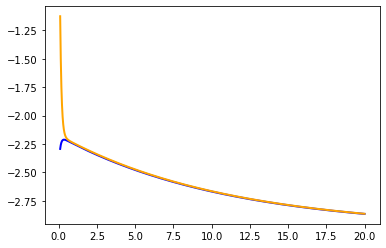

In [24]:

from numpy import * 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def system_2chambers(w,t,p):
    ps,pd = w
    par1,par2,par3 = p
    f = [ pd - ps - par1 * (ps +par3),
        -par2 * (pd - ps)]
    return f

T1 = 0.1
phi = 10
ps0 = -2.5
pd0 = 1
R3 = 3
t = linspace(0.1,20,1000)
p = [T1,phi,R3] #T1 is the ratio of the hydraulic parameters (for high values the top conduit is more efficient)
w0 = [ps0,pd0] #phi measure the effective compressibility of the chambers for  small values  the lower chamber is compressible
wsol = odeint(system_2chambers, w0, t,args =(p,))
ps = wsol[:,0]
pd = wsol[:,1]
ps_analytic = -R3 + (-R3 - pd0 + (R3 + ps0)*(T1 - phi + sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + 1)/2)*exp(t*(-T1/2 - phi/2 - sqrt(4*phi + (-T1 + phi - 1)**2)/2 - 1/2))/sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + (2*R3 + 2*pd0 - (R3 + ps0)*(T1 - phi + sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + 1) + 2*(R3 + ps0)*sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1))*exp(t*(-T1/2 - phi/2 + sqrt(4*phi + (-T1 + phi - 1)**2)/2 - 1/2))/(2*sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1))
pd_analytic =-R3 + (-R3 - pd0 + (R3 + ps0)*(T1 - phi + sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + 1)/2)*(T1/2 - phi/2 - sqrt(4*phi + (-T1 + phi - 1)**2)/2 + 1/2)*exp(t*(-T1/2 - phi/2 - sqrt(4*phi + (-T1 + phi - 1)**2)/2 - 1/2))/sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + (2*R3 + 2*pd0 - (R3 + ps0)*(T1 - phi + sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1) + 1) + 2*(R3 + ps0)*sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1))*(T1/2 - phi/2 + sqrt(4*phi + (-T1 + phi - 1)**2)/2 + 1/2)*exp(t*(-T1/2 - phi/2 + sqrt(4*phi + (-T1 + phi - 1)**2)/2 - 1/2))/(2*sqrt(T1**2 - 2*T1*phi + 2*T1 + phi**2 + 2*phi + 1))
#plt.plot(t,ps,'ko')
plt.plot(t,ps_analytic,'b',linewidth = 2)
#plt.plot(t,pd,'ro')
plt.plot(t,pd_analytic,'orange',linewidth = 2)


plt.show()

In [2]:
solphase

NameError: name 'solphase' is not defined

In the case in which is the lower chamber feeding the eruption the system becomes

\begin{equation}
\frac{\Delta P_d}{dt} =\frac{k_d}{V_d}\left(\frac{\pi a_s^4}{8 mu l_s} (P_s - P_d) - \frac{\pi a_s^4}{8 mu l_s} (P_d + P_t)\right) 
\end{equation}
\begin{equation}
\frac{\Delta P_s}{dt} =-\frac{k_s}{V_s}\frac{\pi a_s^4}{8 mu l_s} (P_s - P_d)
\end{equation}
In dimensionless form, scaling by properties of the lower conduit, properties of the upper chamber, and scaling pressures by $P_t$ they can be written 
\begin{equation}
\frac{\Delta P_d}{dt} =(P_s - P_d) - T_1(P_d + R_3)
\end{equation}
\begin{equation}
\frac{\Delta P_s}{dt} =- \phi (P_s - P_d)
\end{equation}
where 
\begin{equation}
T_1 = \frac{a_s l_d}{a_d l_s}
\end{equation}

\begin{equation}
\phi = \frac{k_d V_s}{k_s V_d }
\end{equation}

\begin{equation}
R_3 = \frac{P_t S}{F_s}
\end{equation}
The general solution is obtained below

In [362]:
from sympy import *
t,T1,phi,R1,R3,R5,n = symbols('t,T1,phi,R1,R3,R5,n',positive = True,real = True)
C1,C2,ps0,pd0 = symbols('C1,C2,ps0,pd0')
ps,pd  = symbols('ps, pd', cls =Function, function = True)
eqps = Eq(diff(ps(t),t), (-1 - T1) * ps(t) + 1 * pd(t) - R3 * T1)
eqpd = Eq(diff(pd(t),t), - phi * (pd(t) - ps(t))) 
sol = dsolve((eqps,eqpd))
const = solve((sol[0].subs(t,0).subs(ps(0),ps0),sol[1].subs(t,0).subs(pd(0),pd0)),{C1,C2})
psPart = sol[0].rhs.subs(const)
pdPart = sol[1].rhs.subs(const)

In [7]:
from sympy import *
x,y,d = symbols('x,y,d')
tx,uz = symbols('tx,uz', cls = Function, function= True)

In [18]:
uz = d/(x**2 + y**2)**(3/2)
uz.diff(x)

-3.0*d*x*(x**2 + y**2)**(-2.5)